In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
from circuits_ttt import *
plt.rcParams.update({'font.size': 14})

Loading games and labels
Data loading complete
Loading games and labels but excluding equivalent games under symmetry
Data loading complete


In [8]:
#filenames = next(os.walk('output/output_30points_20steps/symmetric=false-num_steps=20-data=None-points=30-layout=tcemoid-foldername=output'), (None, None, []))[2]
#asymmetric = [np.load('/Users/p390728/pqc/pqc-symmetry/output/output_30points_20steps/symmetric=false-num_steps=20-data=None-points=30-layout=tcemoid-foldername=output/' + i, allow_pickle=True).item() for i in filenames]
filenames = next(os.walk('/home/frarzani/Documents/Berlin/sides/pqc_heavy_files/output_cluster_pqc/depth_7/symmetric=false-num_steps=20-data=None-points=30-layout=tcemoid-foldername=output'), (None, None, []))[2]
asymmetric = [np.load('/home/frarzani/Documents/Berlin/sides/pqc_heavy_files/output_cluster_pqc/depth_7/symmetric=false-num_steps=20-data=None-points=30-layout=tcemoid-foldername=output/' + i, allow_pickle=True).item() for i in filenames if i != 'params']

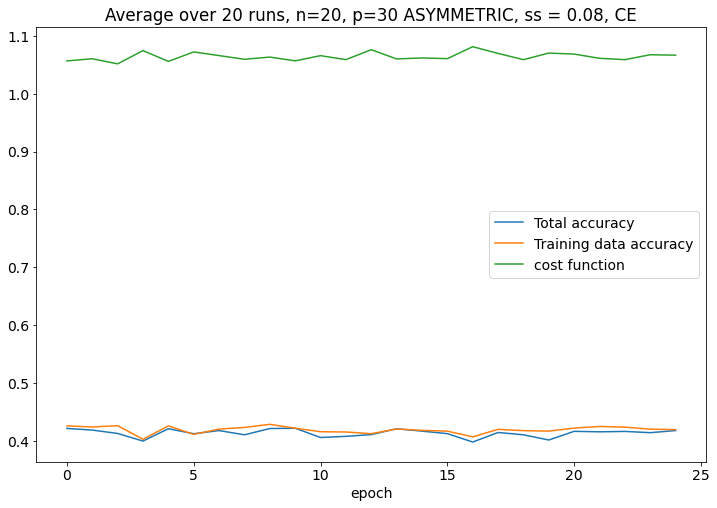

In [10]:
plt.figure(figsize=(12, 8))

epoch_acc = np.array([i['epoch total accuracy'] for i in asymmetric])
epoch_train_acc = np.array([i['epoch accuracy'] for i in asymmetric])
epoch_cost = (torch.tensor([i['epoch cost'] for i in asymmetric])).detach().numpy()
avg_epoch_acc = np.average(epoch_acc, axis=0)
avg_epoch_train_acc = np.average(epoch_train_acc, axis=0)
avg_epoch_cost = np.average(epoch_cost, axis=0)
#plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot([i.trace()/3 for i in avg_epoch_acc], label='Total accuracy')
plt.plot([i.trace()/3 for i in avg_epoch_train_acc], label='Training data accuracy')
plt.plot(avg_epoch_cost, label='cost function')
plt.title('Average over 20 runs, n=20, p=30 ASYMMETRIC, ss = 0.08, CE')
plt.legend()

In [13]:
#filenames = next(os.walk('output/output_30points_20steps/symmetric=true-num_steps=20-data=None-points=30-layout=tcemoid-foldername=output'), (None, None, []))[2]
#symmetric = [np.load('/Users/p390728/pqc/pqc-symmetry/output/output_30points_20steps/symmetric=true-num_steps=20-data=None-points=30-layout=tcemoid-foldername=output/' + i, allow_pickle=True).item() for i in filenames]
filenames = next(os.walk('/home/frarzani/Documents/Berlin/sides/pqc_heavy_files/output_cluster_pqc/depth_7/symmetric=true-num_steps=20-data=None-points=30-layout=tcemoid-foldername=output'), (None, None, []))[2]
symmetric = [np.load('/home/frarzani/Documents/Berlin/sides/pqc_heavy_files/output_cluster_pqc/depth_7/symmetric=true-num_steps=20-data=None-points=30-layout=tcemoid-foldername=output/' + i, allow_pickle=True).item() for i in filenames if i != 'params']

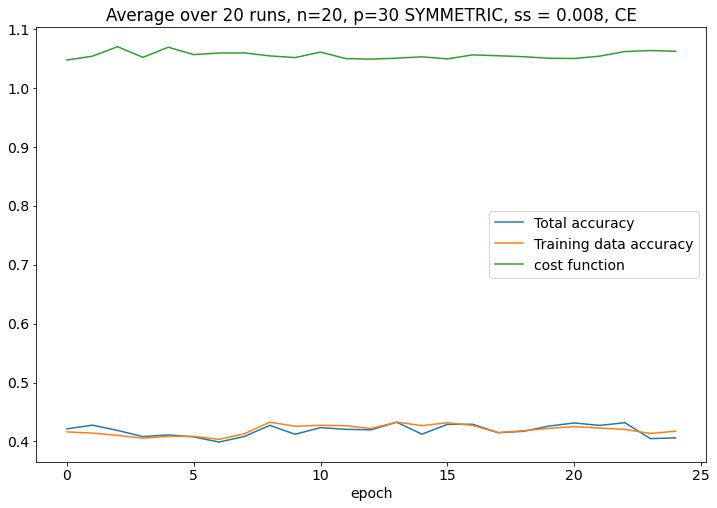

In [14]:
plt.figure(figsize=(12, 8))

epoch_acc = np.array([i['epoch total accuracy'] for i in symmetric])
epoch_train_acc = np.array([i['epoch accuracy'] for i in symmetric])
epoch_cost = (torch.tensor([i['epoch cost'] for i in symmetric])).detach().numpy()
avg_epoch_acc = np.average(epoch_acc, axis=0)
avg_epoch_train_acc = np.average(epoch_train_acc, axis=0)
avg_epoch_cost = np.average(epoch_cost, axis=0)
#plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot([i.trace()/3 for i in avg_epoch_acc], label='Total accuracy')
plt.plot([i.trace()/3 for i in avg_epoch_train_acc], label='Training data accuracy')
plt.plot(avg_epoch_cost, label='cost function')
plt.title('Average over 20 runs, n=20, p=30 SYMMETRIC, ss = 0.008, CE')
plt.legend()

# Mistake in first epoch implementation

In [85]:
test = np.arange(20)
test

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19], requires_grad=True)

In [86]:
random.shuffle(test)
random.shuffle(test)
test

tensor([ 4,  6,  9,  8, 16,  1, 19, 10, 12,  3, 17,  5, 11, 18,  2, 15,
         7, 14, 13,  0], requires_grad=True)

In [87]:
test = np.arange(20).reshape(10, 2)
test

tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15],
        [16, 17],
        [18, 19]], requires_grad=True)

In [88]:
random.shuffle(test)
random.shuffle(test)
test

tensor([[0, 1],
        [0, 1],
        [0, 1],
        [2, 3],
        [0, 1],
        [4, 5],
        [0, 1],
        [0, 1],
        [0, 1],
        [4, 5]], requires_grad=True)

In [100]:
input = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)

In [101]:
input

tensor([[ 0.2813, -0.9526,  1.6508, -1.0014, -0.4721],
        [ 0.8225,  1.5291,  0.5356, -1.3823,  0.2971],
        [ 1.3082, -0.5517,  0.5575, -0.8936,  0.3953]], requires_grad=True)

In [102]:
target

tensor([3, 2, 4])

In [97]:
loss = torch.nn.CrossEntropyLoss()
input = torch.tensor([[0., 0., 0.], requires_grad=True)
target = torch.tensor([0., 0., 0.], requires_grad=True)
output = loss(input, target)


IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

tensor([0., 0., 0.], requires_grad=True)